<a href="https://colab.research.google.com/github/abhiiyer/EIP3/blob/master/Session5/S5E3_AbhishekIyer_RESNET18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-ba8d5g94
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-ba8d5g94
  Running command git submodule update --init --recursive -q
  Stored in directory: /tmp/pip-ephem-wheel-cache-7h7aqk66/wheels/de/2b/fd/29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers


In [0]:
## Load the trained RESNET-18 model [ Change the input to CIFAR-10 input (32,32,3) instead of (224,224,3)]
from classification_models.resnet import ResNet18, preprocess_input

model = ResNet18((32, 32, 3), weights='imagenet', classes=10, include_top=False)

In [0]:
## Since RESNET18 was trained for CIFAR-1000 change the no of classes in the final layer
!pip install -q keras
import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.layers import MaxPooling2D,Activation,GlobalAveragePooling2D

n_classes = 10

x = keras.layers.Conv2D(10, (1, 1), padding='valid')(model.output)
x = GlobalAveragePooling2D()(x)
output = keras.layers.Activation(activation='softmax')(x)
model = keras.models.Model(inputs=[model.input], outputs=[output])

In [14]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_19 (ZeroPadding2 (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_19[0][0]          
__________________________________________________________________________________________________
bn0 (Batch

In [0]:
from keras.utils import np_utils

# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.reshape(y_train.shape[0])  # somehow y_train comes as a 2D nx1 matrix
y_test = y_test.reshape(y_test.shape[0])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

## Pls check this link:- https://stackoverflow.com/questions/49259361/valueerror-decode-predictions-expects-a-batch-of-predictions-i-e-a-2d-array

In [16]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# create data generator
datagen = ImageDataGenerator(
featurewise_center=False,  # set input mean to 0 over the dataset
samplewise_center=False,  # set each sample mean to 0
featurewise_std_normalization=False,  # divide inputs by std of the dataset
samplewise_std_normalization=False,  # divide each input by its std
zca_whitening=False,  # apply ZCA whitening
rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
horizontal_flip=True,  # randomly flip images
vertical_flip=False)  # randomly flip images


# prepare iterator
it_train = datagen.flow(X_train, Y_train, batch_size=32)
it_test = datagen.flow(X_test, Y_test, batch_size=32)


filepath="/content/gdrive/My Drive/Colab Notebooks/Restnet18_PreTrained.hdf5"
mcp_save = keras.callbacks.ModelCheckpoint(filepath, save_best_only=True, monitor='val_loss', mode='min')

steps = int(X_train.shape[0] / 32)
model_details = model.fit_generator(it_train, steps_per_epoch=steps, epochs=50, verbose=2, validation_data=it_test, validation_steps=len(it_test), callbacks=[mcp_save])

# # Score trained model.
scores = model.evaluate_generator(it_test, steps=len(it_test), verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/50
 - 144s - loss: 1.3666 - acc: 0.5245 - val_loss: 1.4824 - val_acc: 0.5017
Epoch 2/50
 - 137s - loss: 1.1682 - acc: 0.5922 - val_loss: 1.6058 - val_acc: 0.5207
Epoch 3/50
 - 137s - loss: 1.1902 - acc: 0.5841 - val_loss: 1.1396 - val_acc: 0.6064
Epoch 4/50
 - 137s - loss: 1.1958 - acc: 0.5810 - val_loss: 1.0740 - val_acc: 0.6195
Epoch 5/50
 - 137s - loss: 1.0885 - acc: 0.6194 - val_loss: 0.9644 - val_acc: 0.6678
Epoch 6/50
 - 137s - loss: 1.0546 - acc: 0.6355 - val_loss: 1.1458 - val_acc: 0.6107
Epoch 7/50
 - 137s - loss: 1.0489 - acc: 0.6370 - val_loss: 3.5045 - val_acc: 0.2312
Epoch 8/50
 - 138s - loss: 1.2291 - acc: 0.5672 - val_loss: 1.2122 - val_acc: 0.5993
Epoch 9/50
 - 137s - loss: 1.0208 - acc: 0.6434 - val_loss: 0.9268 - val_acc: 0.6766
Epoch 10/50
 - 137s - loss: 0.9783 - acc: 0.6601 - val_loss: 1.2158 - val_acc: 0.6143
Epoch 11/50
 - 137s - loss: 1.0709 - acc: 0.6261 - val_loss: 1.4024 - val_acc: 0.5812
Epoch 12/50
 - 137s - loss: 0.9773 - acc: 0.6601 - val_loss: 0.

In [0]:
predictions = model.predict([X_test])
y_class = predictions.argmax(axis=-1)

In [19]:
import numpy as np
correct_indices = np.nonzero(y_class == y_test)[0]
incorrect_indices = np.nonzero(y_class != y_test)[0]

print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")


8218  classified correctly
1782  classified incorrectly


In [28]:
!ls

gdrive	sample_data


In [0]:
from matplotlib.pyplot import imread, imsave

In [46]:
print(type(incorrect_indices)) # Numpy array  
print(incorrect_indices[0])    # 1st incorrectly/misclassified image index
print(len(incorrect_indices))  # Total no of mis-classified images
print(incorrect_indices)       # Printing the array 
print(y_test[2])               # 1st incorrect index which has ACTUAL CLASS=8(SHIP) but MODEL classified it as AUTOMOBILE (CLASS=1)

<class 'numpy.ndarray'>
2
1782
[   2   12   16 ... 9989 9991 9998]
8


i value is  0
incorrect value is  2
i value is  1
incorrect value is  12
i value is  2
incorrect value is  16
i value is  3
incorrect value is  26
i value is  4
incorrect value is  35


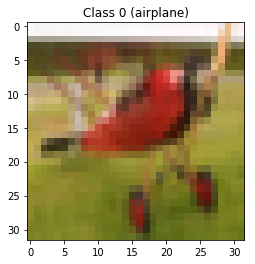

In [51]:
## Save 50 incorrectly classified images and their indices

class_name = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


def draw_img(i):
    im = X_train[i]
    c = y_train[i]
    plt.imshow(im)
    plt.title("Class %d (%s)" % (c, class_name[c]))
    plt.axis('on')
    
    plt.savefig(str(class_name[c])+'.jpg')



for i, incorrect in enumerate(incorrect_indices[:5]):
  print("i value is ",i)
  print("incorrect value is ",incorrect)
  draw_img(incorrect)    

In [52]:
!ls ### To check whether images were saved successfully

airplane.jpg  cat.jpg  gdrive  horse.jpg  sample_data  truck.jpg


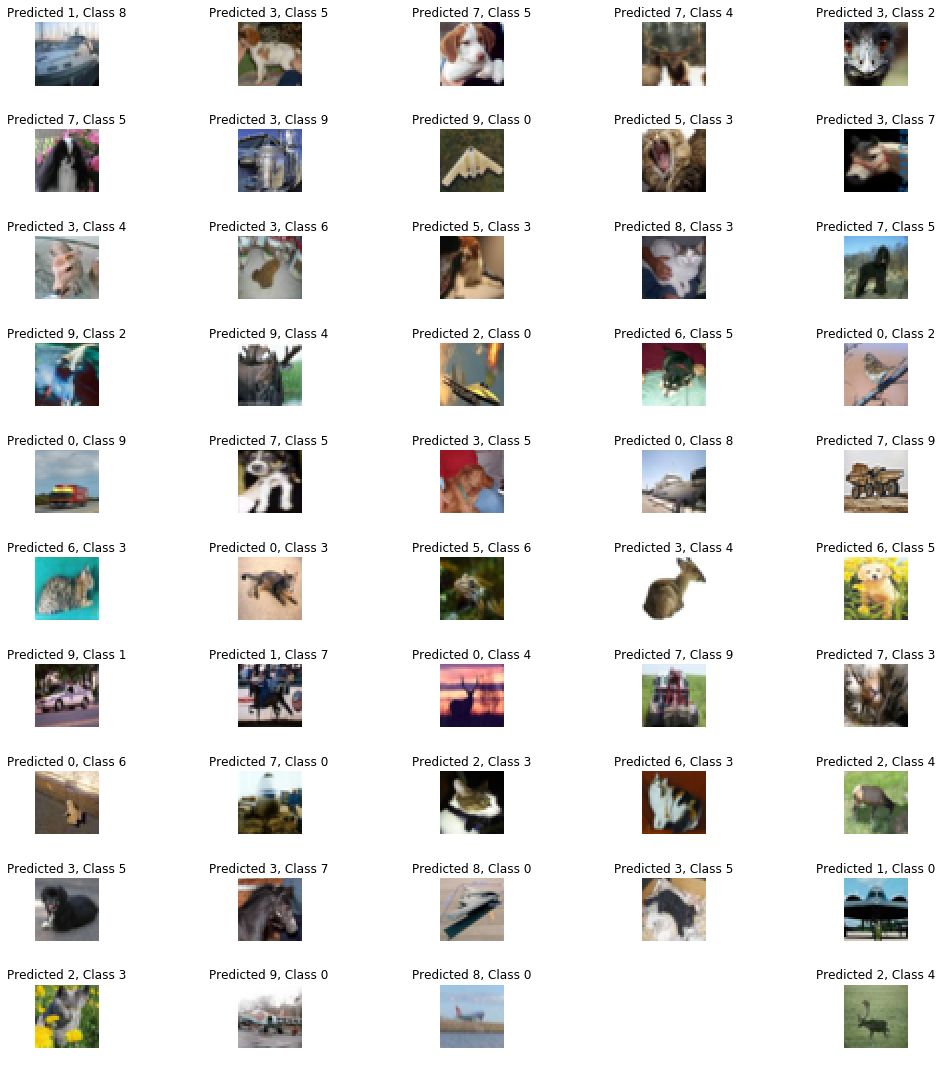

In [53]:
examples_per_class = 8
y_test_pred= y_class

### class_name = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}
## Just for reference

import matplotlib.pyplot as plt


#########  Display 50 correctly classified images ###############

# plt.figure()
# for i, correct in enumerate(correct_indices[:9]):
#     plt.subplot(3, 3, i + 1)
#     plt.imshow(X_test[correct].reshape(32,32,3), interpolation='none')
#     plt.title("Predicted {}, Class {}".format(y_class[correct], y_test[correct]))


#########  Display 50 misclassified images ###############

plt.figure(figsize=(15,15))
for i, incorrect in enumerate(incorrect_indices[:50]):
    #print("i value is ",i)
    plt.subplot(10, 5, i + 1)
    plt.imshow(X_test[incorrect].reshape(32, 32,3), interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_class[incorrect], y_test[incorrect]))
    plt.axis('off')
    plt.tight_layout()


plt.show()

In [54]:
!ls

airplane.jpg  cat.jpg  gdrive  horse.jpg  sample_data  truck.jpg


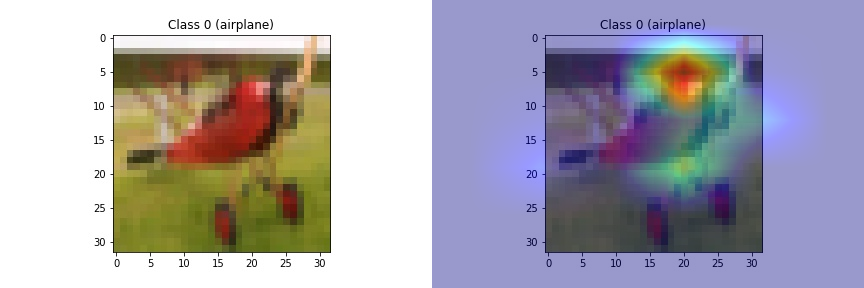

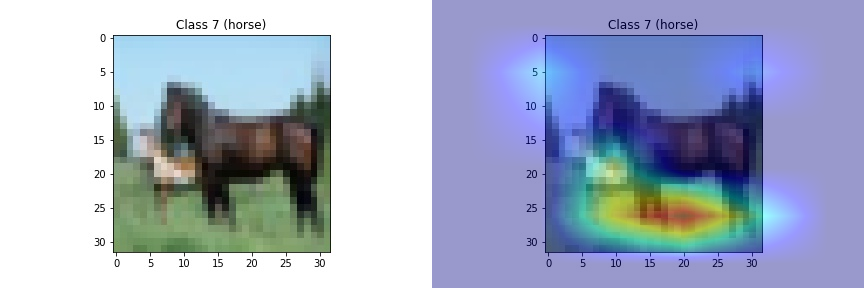

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


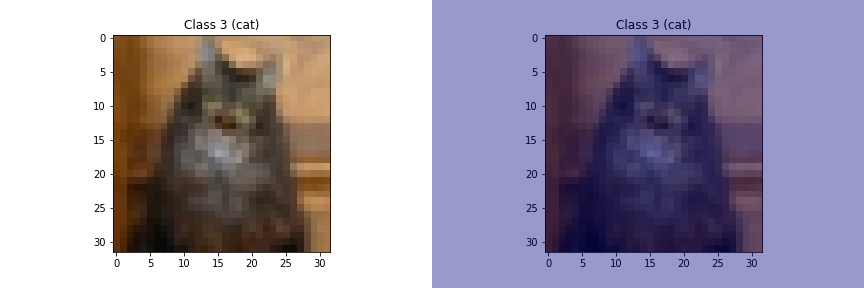

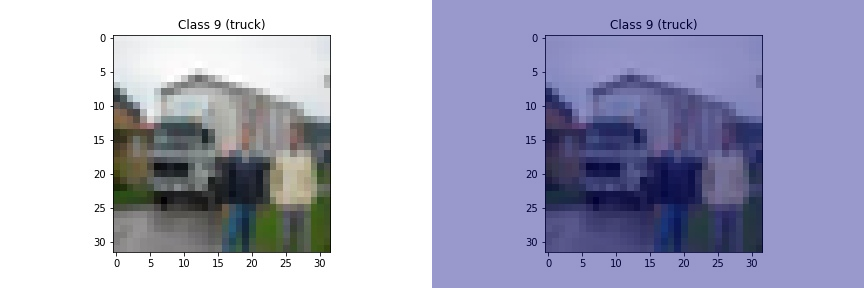

In [73]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import cv2

img_path_list = ['/content/airplane.jpg','/content/horse.jpg','/content/cat.jpg','/content/truck.jpg']

for i in range(len(img_path_list)):
  img_path = img_path_list[i]
  img = image.load_img(img_path, target_size=(32, 32))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("zero_padding2d_29") #,conv2d_2,,stage4_unit2_conv2(512),global_average_pooling2d_3(10),stage2_unit1_conv2(128),global_average_pooling2d_3(10),stage1_unit2_conv2(64),zero_padding2d_27(128)

  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(128):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  from google.colab.patches import cv2_imshow

  img = cv2.imread(img_path)
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  numpy_horizontal_concat = np.concatenate((img, superimposed_img), axis=1)
  cv2_imshow(numpy_horizontal_concat)


0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[849  18  20   7   7   1   9   9  27  53]
 [  8 902   1   3   0   0   2   1  10  73]
 [ 45   7 772  37  30  29  51  20   0   9]
 [ 19   8  50 687  30  77  70  33  10  16]
 [  9   2  43  43 767  11  73  39   6   7]
 [  6   6  34 150  26 669  31  53  11  14]
 [  7   6  17  25  10   6 916   5   1   7]
 [ 10   3  15  28  25  13   8 885   1  12]
 [ 59  23   5   9   2   0   6   5 851  40]
 [ 16  47   0   6   0   0   4   4   3 920]]


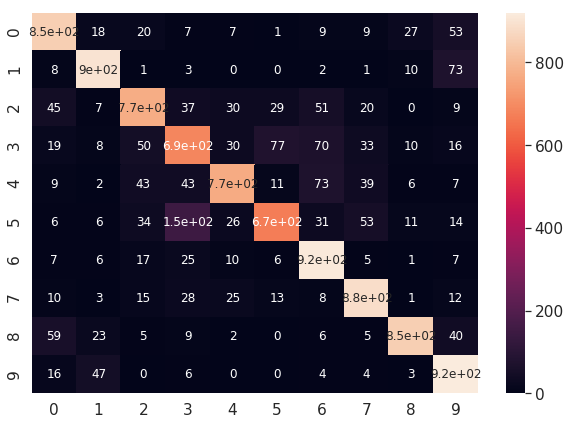

In [64]:
#### Confusion Matrix (Add elements along the diagonal = No of correctly classified images)

from sklearn.metrics import classification_report, confusion_matrix
 
for ix in range(10):
    print(ix, confusion_matrix(np.argmax(Y_test,axis=1),y_class)[ix].sum())

cm = confusion_matrix(np.argmax(Y_test,axis=1),y_class)
print(cm)


# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd
 
df_cm = pd.DataFrame(cm, range(10), range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()